In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gdp
import descartes
from shapely.geometry import Point, Polygon

In [3]:
#df = pd.read_csv('https://www.datos.gov.co/resource/hbaj-th4x.csv', nrows=10000)
df = pd.read_csv('Colocaciones_de_cr_dito_Sector_Agropecuario_2020.csv')

In [4]:
df.shape

(104070, 28)

In [5]:
df.isnull().any()

Año                                      False
Mes                                      False
fuente Colocacion                        False
Id Tipo Prod                             False
Tipo Productor                           False
Valor Inversion                          False
Colocacion                               False
ID Depto                                 False
Departamento Inversion                   False
Id Munic                                 False
Municipio Inversion                      False
Municipio de PostConflico?               False
DEPCOL                                   False
Departamento de Colocacion de Credito    False
MUNCOL                                   False
Municipio Colocacion de Credito          False
Plazo                                    False
Linea de Credito                         False
Linea de Produccion                      False
ID Rubro                                 False
Destino de Credito                       False
Genero       

In [6]:
df['% FAG'].fillna(0.0, inplace=True)
df['Vlr Inic Garantia'].fillna(0.0, inplace=True)
#df.isnull().any()

In [7]:
for ii in df.columns: 
    print('----- {}'.format(ii))
    print(df[ii].value_counts())

----- Año
2020    104070
Name: Año, dtype: int64
----- Mes
2    35745
1    35015
3    33310
Name: Mes, dtype: int64
----- fuente Colocacion
REDESCUENTO     67633
SUSTITUTA       35944
AGROPECUARIA      493
Name: fuente Colocacion, dtype: int64
----- Id Tipo Prod
0    85806
1    14753
2     3511
Name: Id Tipo Prod, dtype: int64
----- Tipo Productor
PEQUEÑO    85806
MEDIANO    14753
GRANDE      3511
Name: Tipo Productor, dtype: int64
----- Valor Inversion
0.0            10184
10000000.0      6254
15000000.0      4066
5000000.0       3560
12000000.0      3397
6000000.0       3307
8000000.0       3005
3000000.0       2953
4000000.0       2298
2000000.0       2161
20000000.0      2086
7000000.0       1997
2500000.0       1509
12500000.0      1125
3500000.0       1082
16000000.0       999
9000000.0        929
7500000.0        928
2200000.0        921
1054000.0        912
1500000.0        907
3200000.0        896
14000000.0       833
1000000.0        818
25000000.0       810
1100000.0        

11001    2384
41551    1637
52001    1636
19001    1363
5001     1327
15001    1143
52356    1105
76001     968
41298     745
5034      738
41396     702
15176     675
19698     643
52399     628
50001     581
41001     577
68679     574
85001     568
52838     551
17001     544
17541     544
13430     516
68001     503
5101      482
66001     480
25843     478
73001     471
81001     467
70708     459
73067     447
         ... 
25260       8
25793       7
8372        7
88001       7
88564       7
5353        6
13836       6
5390        6
5380        6
20295       6
76306       6
68498       5
27787       5
25841       5
20787       5
54553       5
52385       4
25785       2
25815       2
68344       2
27205       2
52079       1
23182       1
8758        1
68121       1
8573        1
25200       1
44874       1
73030       1
68209       1
Name: MUNCOL, Length: 814, dtype: int64
----- Municipio Colocacion de Credito
SANTAFE DE BOGOTA D.C.         2384
PITALITO                       1

POINT (-76.1666667 1.75)            1586
POINT (-74.0833333 4.6)             1222
POINT (-77.6444444 0.8302778)        894
POINT (-75.5361111 6.2913889)        831
POINT (-75.5833333 2.25)             778
POINT (-75.9166667 5.5833333)        709
POINT (-76.4866667 3.0130556)        628
POINT (-76.1666667 2.4166667)        612
POINT (-77.9166667 0.9166667)        524
POINT (-77.27864742 1.214670737)     493
POINT (-74.7533333 9.2413889)        486
POINT (-77.5833333 1.1666667)        479
POINT (-75.5205556 5.07)             477
POINT (-75.2322222 4.4388889)        469
POINT (-75.1666667 8.5833333)        445
POINT (-77 2.5)                      437
POINT (-75.9166667 6.2)              427
POINT (-73.635 4.1533333)            422
POINT (-75.9166667 5.25)             403
POINT (-76.5 2.75)                   399
POINT (-77.0833333 1.5833333)        394
POINT (-76.6666667 2.6666667)        391
POINT (-75.5833333 3.75)             387
POINT (-75.9116667 4.7463889)        382
POINT (-71.9 5.8

In [9]:
df.columns

Index([u'Año', u'Mes', u'fuente Colocacion', u'Id Tipo Prod',
       u'Tipo Productor', u'Valor Inversion', u'Colocacion', u'ID Depto',
       u'Departamento Inversion', u'Id Munic', u'Municipio Inversion',
       u'Municipio de PostConflico?', u'DEPCOL',
       u'Departamento de Colocacion de Credito', u'MUNCOL',
       u'Municipio Colocacion de Credito', u'Plazo', u'Linea de Credito',
       u'Linea de Produccion', u'ID Rubro', u'Destino de Credito', u'Genero',
       u'% FAG', u'Vlr Inic Garantia', u'LATITUD', u'LONGITUD', u'CANTIDAD',
       u'Coordenada', u'Tipo de Produccion'],
      dtype='object')

01. **a_o:** Año
02. **mes:** Meses
03. **fuente_colocacion:** Fuente de colocación ('redescuento', 'sustituta', 'agropecuaria')
04. **id_tipo_prod:** ID del tipo de producto (0, 1, 2)
05. **tipo_productor:** Tipo de producto ('pequeño', 'mediano', 'grande')
06. **valor_inversion:** Valor de la inversion. 10184 datos con 0
07. **colocacion:** Colocación
08. **id_depto:** ID del departamento donde se realizo la inversion
09. **departamento_inversion:** Departamento donde se realizo la inversion
10. **id_munic:** ID del municipio donde se realizo la inversion
11. **municipio_inversion:** Municipio donde se realizo la inversion
12. **municipio_de_postconflico:** Es un municipio de postconflicto ('N', 'S')
13. **depcol** ID del departamento de Colombia
14. **departamento_de_colocacion** Departamento de colocacion de credito
15. **muncol** ID del municipio de Colombia
16. **municipio_colocacion_de** Municipio colocacion de credito
17. **plazo** Plazo de las cuotas
18. **linea_de_credito** Linea de credito ('capital de trabajo', 'inversion', 'normalizacion de cartera')
19. **linea_de_produccion** Linea de produccion ('Sostenimiento', 'microcredito', 'siembras', ...)
20. **id_rubro** ID Rubro
21. **destino_de_credito** Destino de Credito ('cafe', 'arroz riego', ...)
22. **genero** Genero ('hombre', 'mujer', 'persona juridica', 'no aplica')
23. **% FAG** Es un Fondo cuyo objetivo es respaldar los crédito. (Fondo Agropecuario de Garantías)
24. **vlr_inic_garantia** Vlr Inic Garantia
25. **latitud** Latitud
26. **longitud** Longitud
27. **cantidad** Dice 1
28. **geocoded_column** Coordenada

In [8]:
df['Tipo de Produccion'] = df['Linea de Produccion'].apply(lambda x: x[-4:])
df['Linea de Produccion'].value_counts()

SOSTENIMIENTO (CT)                 26630
MICROCREDITO (CT)                  22472
COMPRA DE ANIMALES (I)             18820
SIEMBRAS (I)                       17135
PRODUCCIÓN (CT)                     6262
INFRAEST Y ADECU DE TIERRAS (I)     4190
COMERCIALIZACION (CT)               3296
SERVICIOS DE APOYO (CT)             1311
OTRAS ACTIVIDADES (I)               1266
COMERCIALIZACION (I)                1062
MAQUINARIA Y EQUIPO (I)              950
ACTIVIDADES RURALES (CT)             271
SERVICIOS DE APOYO  (I)              204
CONSOLIDACION DE PASIVOS (N)         102
ACTIVIDADES RURALES (I)               99
Name: Linea de Produccion, dtype: int64

In [65]:
df['Destino de Credito'].value_counts()

CAPITAL DE TRABAJO MICROCREDITO RURAL                                             22472
CAPITAL DE TRABAJO UNIDAD PROD CAMPESINA                                          13954
VIENTRES BOVINOS CRIA Y DOBLE PROPOSITO                                            8607
CAFE TECNIFICADO                                                                   6015
VIENTRES COMERCIALES BOVINOS LECHE                                                 4266
CAFÉ                                                                               4012
253400 VIENTRES BOVINOS COMRECIALES CRÍA Y D. P. - COMERCIAL - COMPRA - HEMBRA     2763
PLATANO - INVERSIÓN                                                                2645
PAPA                                                                               2233
CARTERA INVENTARIOS Y COSTOS DIRECTOS                                              2076
CAÑA PANELERA - INVERSIÓN                                                          1944
RETENCIÓN VIENTRES BOVINOS CRÍA 

In [20]:
df.groupby(['Departamento Inversion', 'Tipo de Produccion'])[['Valor Inversion']].describe()

Valor Inversion                \
                                                    count          mean   
Departamento Inversion Tipo de Produccion                                 
AMAZONAS                (I)                           1.0  1.503310e+08   
                       (CT)                           5.0  1.165000e+08   
ANTIOQUIA               (I)                        4907.0  7.043464e+07   
                        (N)                           9.0  3.635822e+11   
                       (CT)                        6627.0  1.092062e+08   
ARAUCA                  (I)                         501.0  2.858082e+07   
                       (CT)                         485.0  8.178951e+06   
ATLANTICO               (I)                         119.0  2.663066e+08   
                       (CT)                         590.0  5.579529e+08   
BOGOTA D.E.             (I)                         216.0  1.005172e+09   
                        (N)                           1.0  1.850000e+10   
                       (CT)                        1005.0  1.074745e+09   
BOLIVAR                 (I)                         722.0  4.648592e+08   
                        (N)                           1.0  9.326421e+07   
                       (CT)                        1306.0  3.009907e+07   
BOYACA                  (I)                        6319.0  1.670571e+07   
                        (N)                          21.0  4.202918e+07   
                       (CT)                        4486.0  1.097141e+07   
CALDAS                  (I)                        1158.0  3.863115e+07   
                        (N)                           6.0  7.965596e+06   
                       (CT)                        2737.0  2.233719e+07   
CAQUETA                 (I)                         963.0  2.623560e+07   
                        (N)                           5.0  2.348583e+07   
                       (CT)                         414.0  4.222251e+06   
CASANARE                (I)                         930.0  5.813044e+07   
                        (N)                           1.0  7.068969e+09   
                       (CT)                        1066.0  1.668825e+08   
CAUCA                   (I)                        2644.0  1.903461e+07   
                        (N)                           1.0  3.840000e+06   
                       (CT)                        3188.0  1.695041e+07   
...                                                   ...           ...   
NARIÑO                 (CT)                        5543.0  7.234007e+06   
NORTE DE SANTANDER      (I)                        1577.0  2.801993e+07   
                        (N)                           4.0  2.168030e+07   
                       (CT)                        1453.0  4.538893e+07   
PUTUMAYO                (I)                         534.0  1.613564e+07   
                        (N)                           2.0  3.067211e+07   
                       (CT)                         622.0  4.038592e+06   
QUINDIO                 (I)                         226.0  8.053671e+07   
                        (N)                           5.0  1.093200e+07   
                       (CT)                         778.0  1.933240e+07   
RISARALDA               (I)                         540.0  1.130514e+08   
                        (N)                           1.0  3.879710e+06   
                       (CT)                        1654.0  1.927890e+07   
SAN ANDRES              (I)                          13.0  1.694166e+07   
                       (CT)                           4.0  2.027250e+08   
SANTANDER               (I)                        3622.0  4.391920e+07   
                        (N)                           8.0  1.180532e+07   
                       (CT)                        3154.0  7.312642e+07   
SUCRE                   (I)                         444.0  5.195152e+07   
                       (CT)                        1385.0  1.119664

In [17]:
df.groupby(['Departamento Inversion', 'Linea de Produccion'])[['Valor Inversion']].describe()

Valor Inversion  \
                                                                 count   
Departamento Inversion Linea de Produccion                               
AMAZONAS               ACTIVIDADES RURALES (CT)                    1.0   
                       COMERCIALIZACION (CT)                       2.0   
                       INFRAEST Y ADECU DE TIERRAS (I)             1.0   
                       SERVICIOS DE APOYO (CT)                     2.0   
ANTIOQUIA              ACTIVIDADES RURALES (CT)                    8.0   
                       ACTIVIDADES RURALES (I)                    15.0   
                       COMERCIALIZACION (CT)                     534.0   
                       COMERCIALIZACION (I)                      230.0   
                       COMPRA DE ANIMALES (I)                   1802.0   
                       CONSOLIDACION DE PASIVOS (N)                9.0   
                       INFRAEST Y ADECU DE TIERRAS (I)           509.0   
                       MAQUINARIA Y EQUIPO (I)                    63.0   
                       MICROCREDITO (CT)                        1625.0   
                       OTRAS ACTIVIDADES (I)                     195.0   
                       PRODUCCIÓN (CT)                           217.0   
                       SERVICIOS DE APOYO (CT)                   293.0   
                       SERVICIOS DE APOYO  (I)                    45.0   
                       SIEMBRAS (I)                             2048.0   
                       SOSTENIMIENTO (CT)                       3950.0   
ARAUCA                 COMERCIALIZACION (CT)                       3.0   
                       COMERCIALIZACION (I)                        7.0   
                       COMPRA DE ANIMALES (I)                    226.0   
                       INFRAEST Y ADECU DE TIERRAS (I)            35.0   
                       MAQUINARIA Y EQUIPO (I)                     8.0   
                       MICROCREDITO (CT)                         166.0   
                       OTRAS ACTIVIDADES (I)                       7.0   
                       PRODUCCIÓN (CT)                            26.0   
                       SERVICIOS DE APOYO (CT)                     1.0   
                       SIEMBRAS (I)                              218.0   
                       SOSTENIMIENTO (CT)                        289.0   
...                                                                ...   
TOLIMA                 OTRAS ACTIVIDADES (I)                     103.0   
                       PRODUCCIÓN (CT)                           586.0   
                       SERVICIOS DE APOYO (CT)                    24.0   
                       SERVICIOS DE APOYO  (I)                     6.0   
                       SIEMBRAS (I)                             1474.0   
                       SOSTENIMIENTO (CT)                       1323.0   
VALLE                  ACTIVIDADES RURALES (CT)                    5.0   
                       ACTIVIDADES RURALES (I)                     4.0   
                       COMERCIALIZACION (CT)                     371.0   
                       COMERCIALIZACION (I)                       59.0   
                       COMPRA DE ANIMALES (I)                    244.0   
                       CONSOLIDACION DE PASIVOS (N)                5.0   
                       INFRAEST Y ADECU DE TIERRAS (I)           118.0   
                       MAQUINARIA Y EQUIPO (I)                    64.0   
                       MICROCREDITO (CT)                        1190.0   
                       OTRAS ACTIVIDADES (I)                      73.0   
                       PRODUCCIÓN (CT)                            78.0   
                       SERVICIOS DE APOYO (CT)                   211.0   
                       SERVICIOS DE APOYO  (I)                    30.0   
                       SIEMBRAS (I)                              568.0   
                       SOSTENIMIENTO (CT)                  

In [66]:
df['Departamento Inversion'].value_counts()

ANTIOQUIA             11543
BOYACA                10826
CUNDINAMARCA          10380
NARIÑO                 9061
HUILA                  7550
SANTANDER              6784
CAUCA                  5833
TOLIMA                 5481
VALLE                  4094
CALDAS                 3901
CORDOBA                3838
NORTE DE SANTANDER     3034
META                   2369
RISARALDA              2195
BOLIVAR                2029
CASANARE               1997
SUCRE                  1829
MAGDALENA              1601
CESAR                  1432
CAQUETA                1382
BOGOTA D.E.            1222
PUTUMAYO               1158
QUINDIO                1009
ARAUCA                  986
GUAJIRA                 981
ATLANTICO               709
GUAVIARE                347
CHOCO                   332
VICHADA                 107
VAUPES                   26
SAN ANDRES               17
GUAINIA                  11
AMAZONAS                  6
Name: Departamento Inversion, dtype: int64

In [70]:
df.groupby('Departamento Inversion')[['Valor Inversion']].sum().sort_values('Valor Inversion')[-5:]

,Valor Inversion
Departamento Inversion,
SANTANDER,3.898105e+11
CUNDINAMARCA,8.889700e+11
VALLE,1.258856e+12
BOGOTA D.E.,1.315736e+12
ANTIOQUIA,4.341573e+12


In [21]:
df.groupby('Departamento Inversion')[['Valor Inversion']].sum().sort_values('Valor Inversion')[:5]

,Valor Inversion
Departamento Inversion,
VAUPES,4.809400e+07
GUAINIA,8.524509e+07
AMAZONAS,7.328310e+08
SAN ANDRES,1.031142e+09
VICHADA,2.904774e+09


In [61]:
geometry = [Point(xy) for xy in zip(df['LONGITUD'], df['LATITUD'])]
crs = {'init':'epsg:4326'}
geo_df = gdp.GeoDataFrame(df['Departamento Inversion'], crs=crs, geometry=geometry)

In [47]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

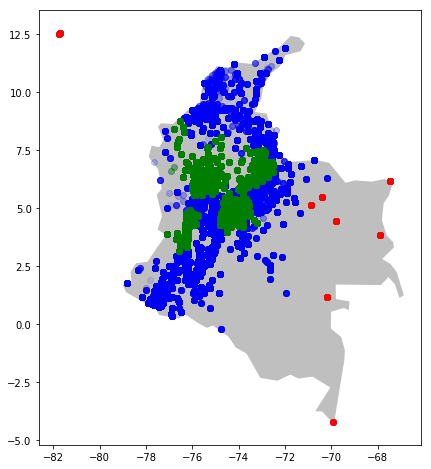

In [64]:
fig, axes = plt.subplots(figsize=(8, 8))
world[world['name'] == 'Colombia']['geometry'].plot(color='gray', alpha=0.5, ax=axes)
geo_df.plot(color='b', alpha=0.1, ax=axes)
for ii in ['ANTIOQUIA', 'BOGOTA D.E.', 'VALLE', 'CUNDINAMARCA', 'SANTANDER']:
    geo_df[geo_df['Departamento Inversion'] == ii].plot(color='g', alpha=0.4, ax=axes)
for ii in ['VICHADA', 'SAN ANDRES', 'AMAZONAS', 'GUAINIA', 'VAUPES']:
    geo_df[geo_df['Departamento Inversion'] == ii].plot(color='r', alpha=0.4, ax=axes)